In [9]:
import matrixprofile as mp
import preprocessing
import shared_constants
from data_reading.phyphox import get_experiments, read_experiment
%matplotlib inline


# down sampling rate: we use every nth sample
listening_rate = 10

experiments = get_experiments()
data_frame = read_experiment(experiments[0])
data_frame = preprocessing.align_data(data_frame, listening_rate=listening_rate)

# calculate auto-correlation coefficients for acceleration
_regex = "{sensor_name}_{dimension}".format(sensor_name="acceleration",
                                            dimension=shared_constants.DIMENSIONS_KEY_LIST)
acceleration_data_frame = data_frame.filter(regex=_regex, axis=1)
# calculate auto-correlation coefficients for gyroscope
_regex = "{sensor_name}_{dimension}".format(sensor_name="gyroscope", dimension=shared_constants.DIMENSIONS_KEY_LIST)
gyroscope_data_frame = data_frame.filter(regex=_regex, axis=1)

/Users/julio/Documents/Uni/5_Master/Master Project/mp-mental-health-2020/src/preprocessing/_data_frame.py:31: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  time_delta_index = pd.TimedeltaIndex(timestamp_to_date, unit=output_timestamp_unit)


/Users/julio/opt/anaconda3/envs/master-project/lib/python3.7/site-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/Users/julio/opt/anaconda3/envs/master-project/lib/python3.7/site-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/Users/julio/opt/anaconda3/envs/master-project/lib/python3.7/site-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


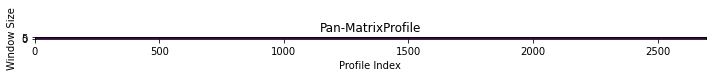

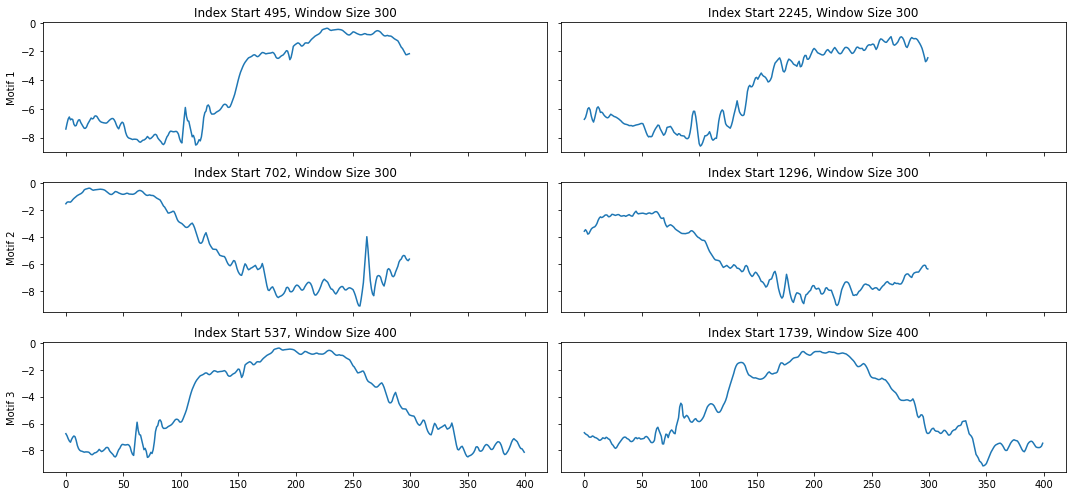

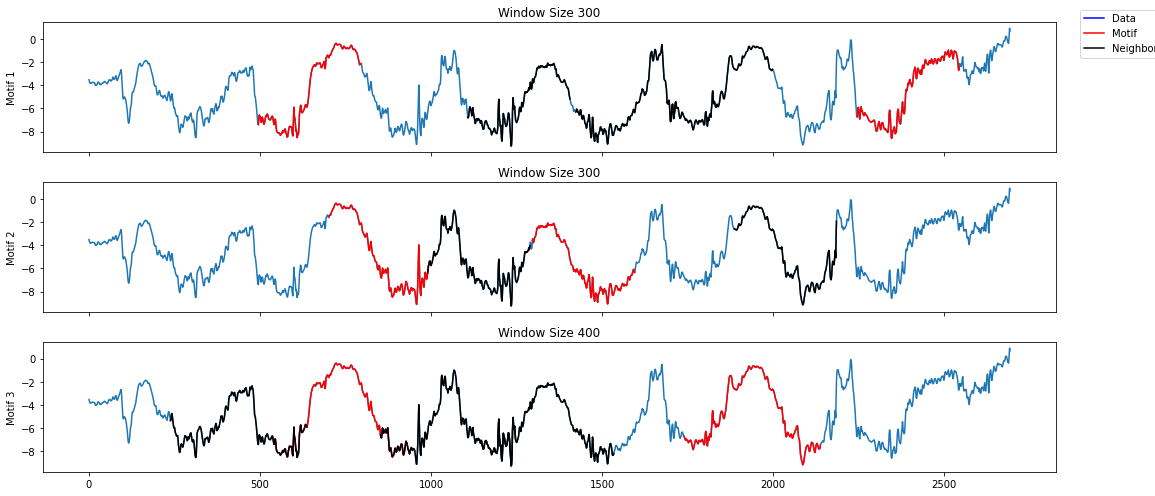

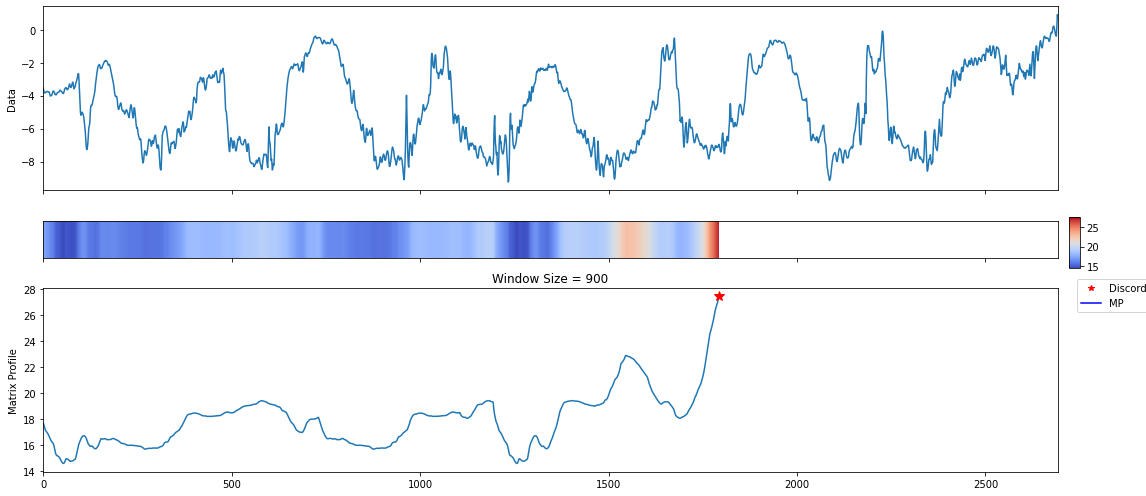

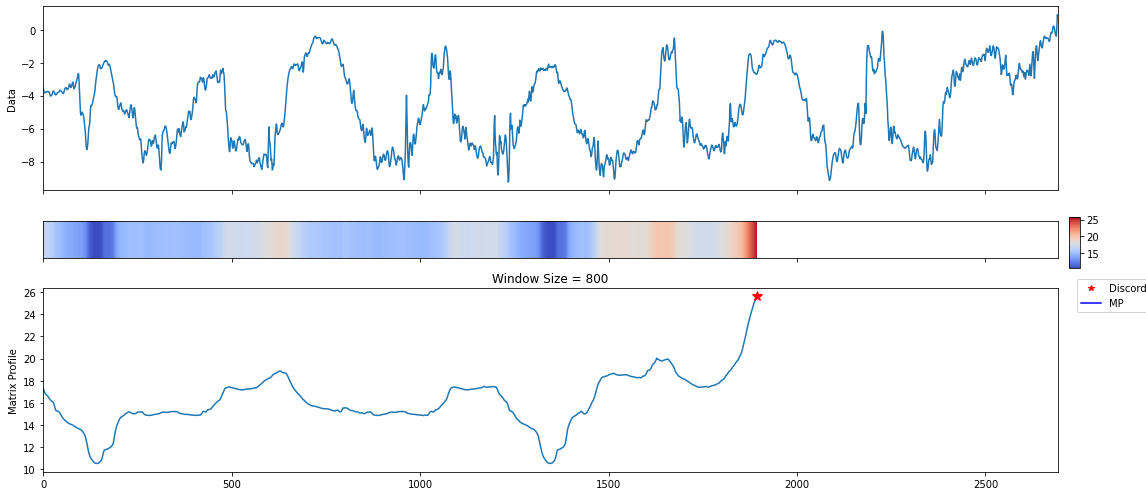

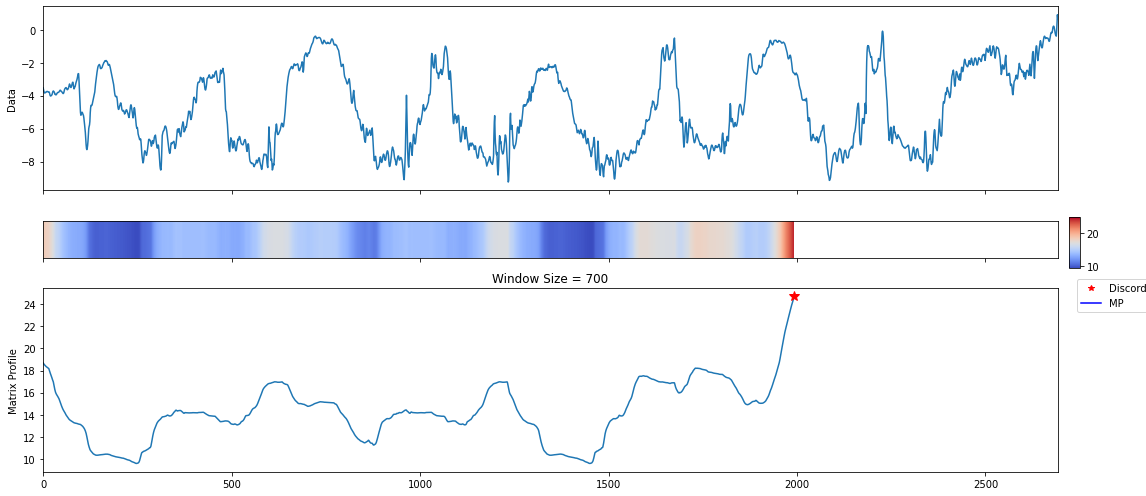

In [10]:
# analyze the matrix profile for actions that take between 3 and 10 seconds
windows = list(range(300,1000,100))
# run analyze on all cpu cores
profile, figures = mp.analyze(acceleration_data_frame['acceleration_x'].to_numpy(), n_jobs=-1, windows=windows)

## Create matrix profiles for each accelerometer and gyro dimension

Look at time windows of 3 to 10 seconds

### Acceleration x

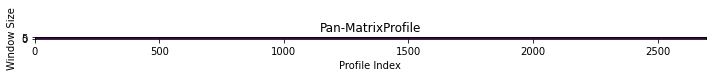

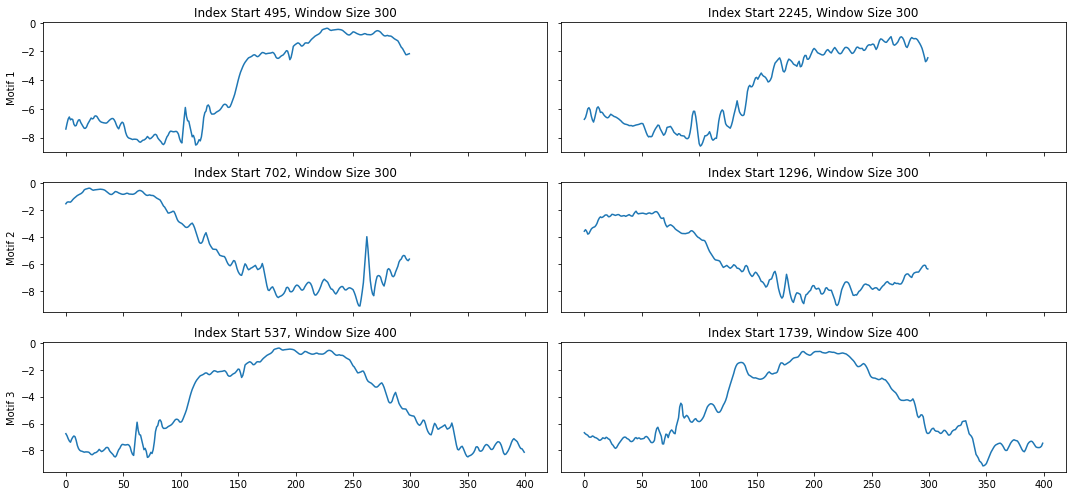

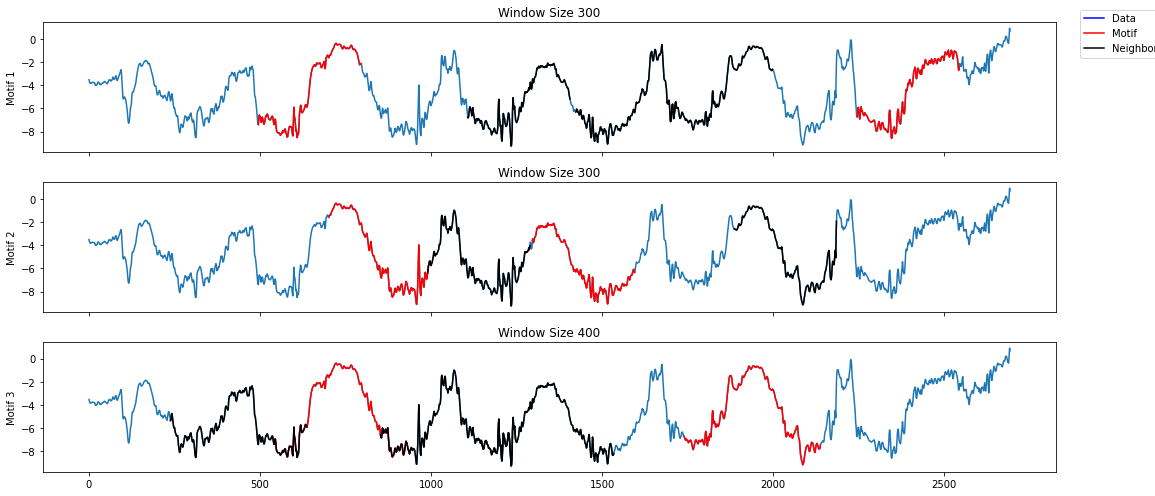

In [11]:
# run analyze on all cpu cores
profile = mp.compute(acceleration_data_frame['acceleration_x'].to_numpy(), n_jobs=-1, windows=windows)
profile_motifs = mp.discover.motifs(profile, k=3)
figures = mp.visualize(profile_motifs)

### Acceleration y

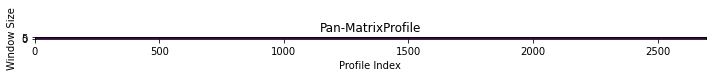

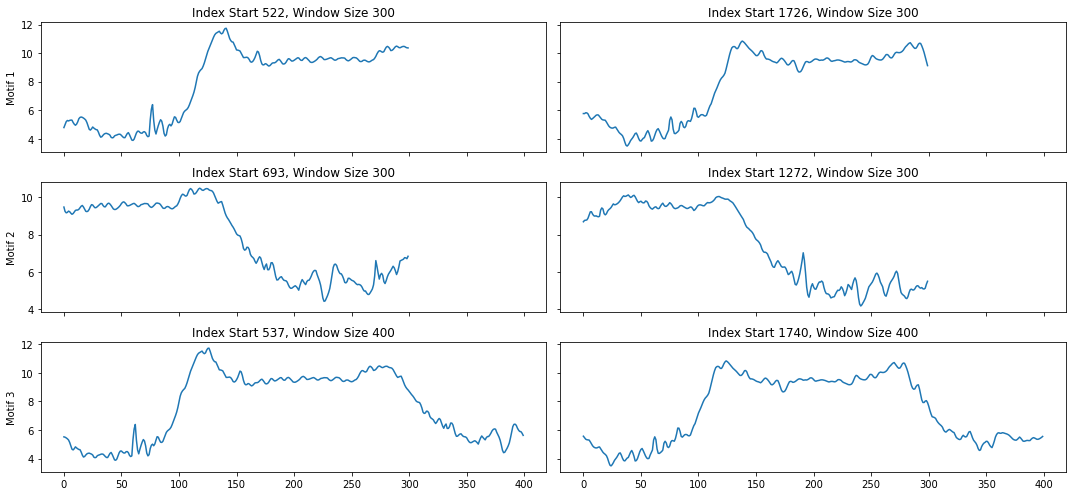

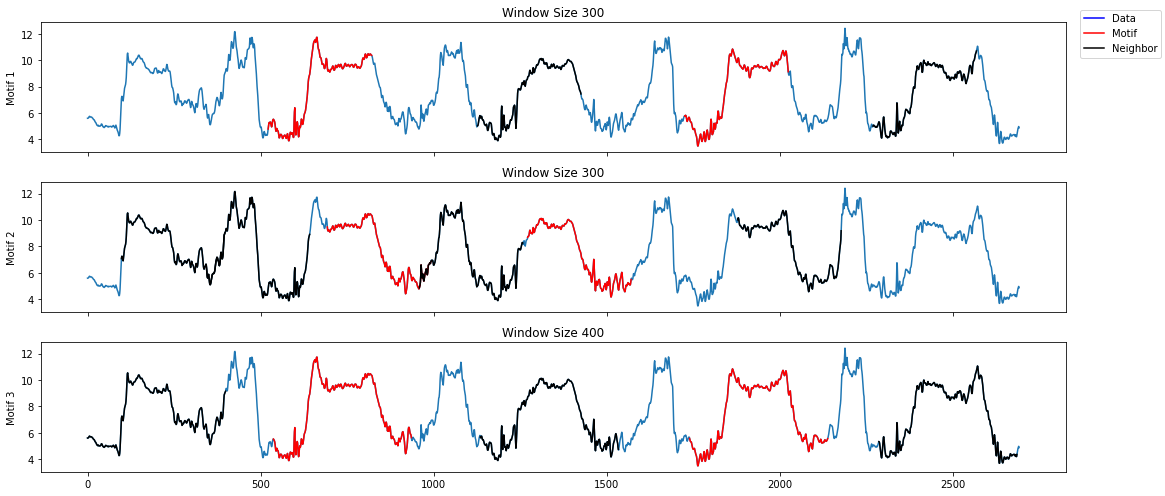

In [12]:
profile = mp.compute(acceleration_data_frame['acceleration_y'].to_numpy(), n_jobs=-1, windows=windows)
profile_motifs = mp.discover.motifs(profile, k=3)
figures = mp.visualize(profile_motifs)

### Acceleration z

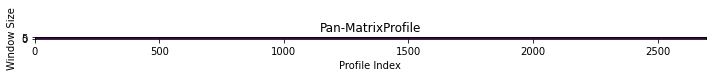

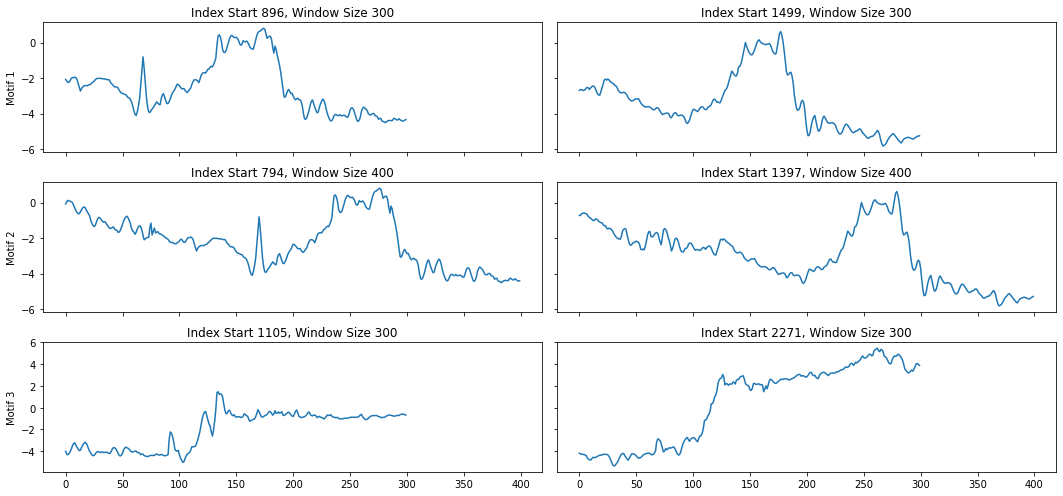

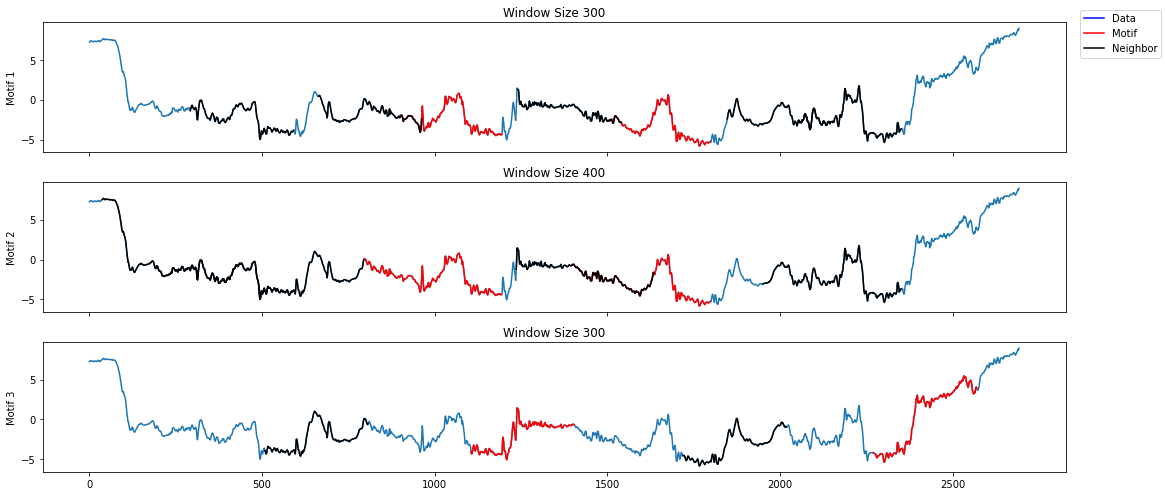

In [13]:
profile = mp.compute(acceleration_data_frame['acceleration_z'].to_numpy(), n_jobs=-1, windows=windows)
profile_motifs = mp.discover.motifs(profile, k=3)
figures = mp.visualize(profile_motifs)


### Gyro x

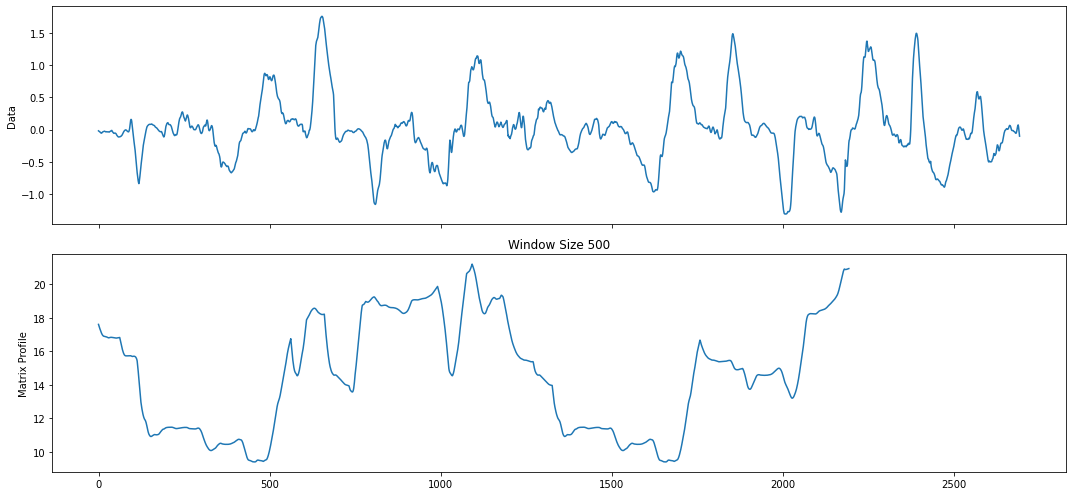

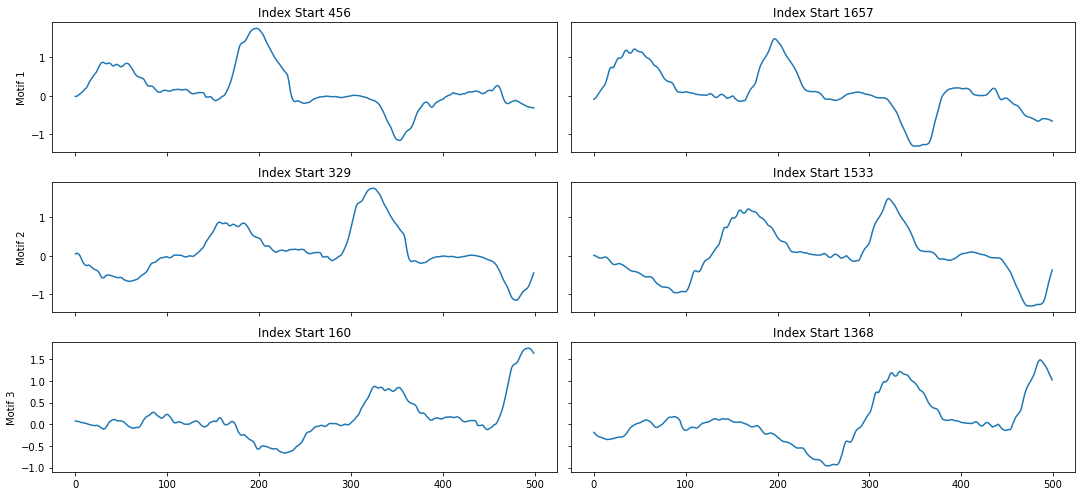

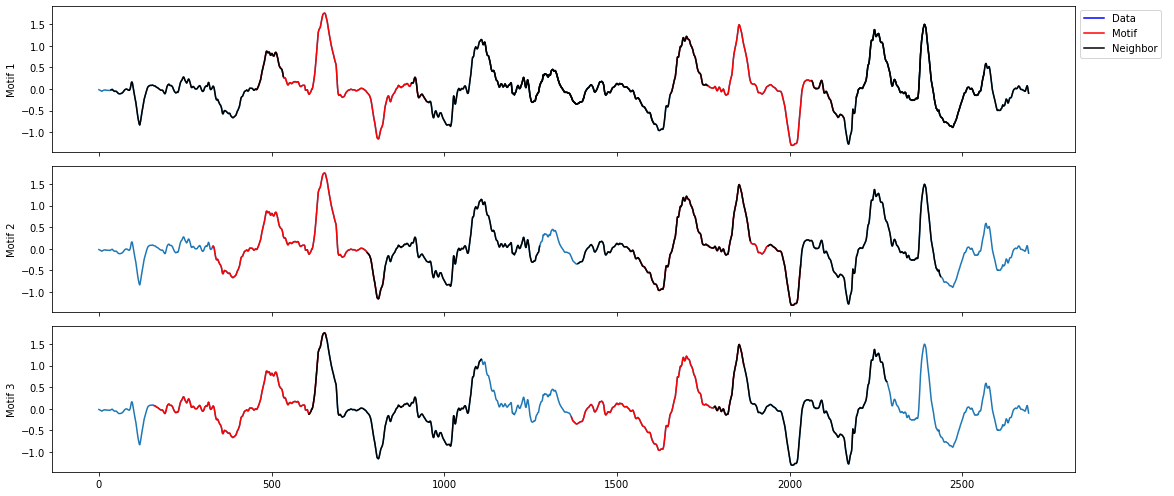

In [14]:
profile = mp.compute(gyroscope_data_frame['gyroscope_x'].to_numpy(), n_jobs=-1, windows=window_size)
profile_motifs = mp.discover.motifs(profile, k=3)
figures = mp.visualize(profile_motifs)


### Gyro y

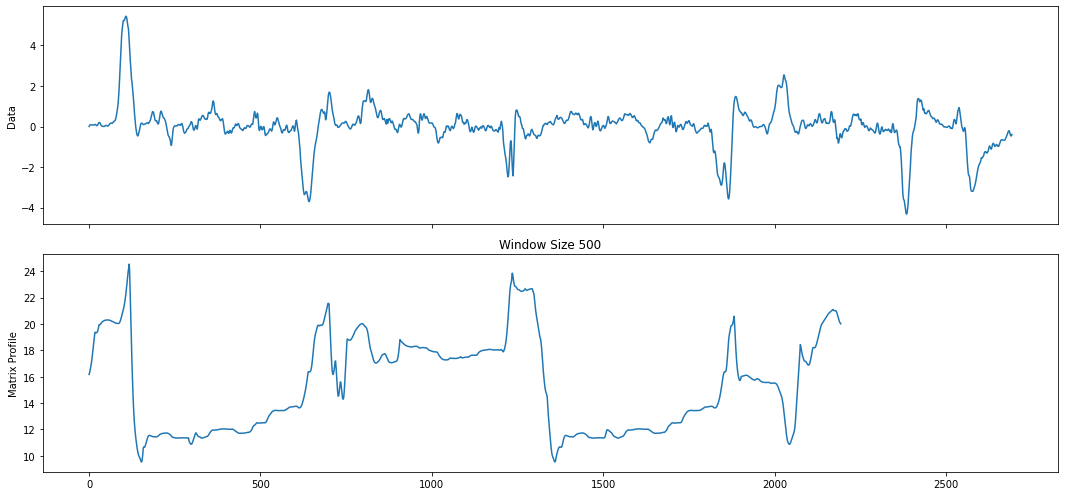

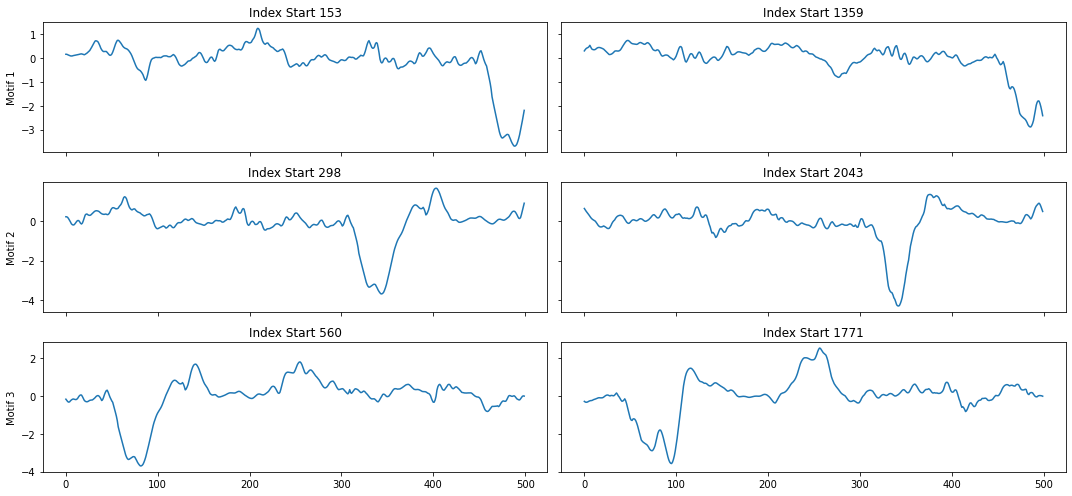

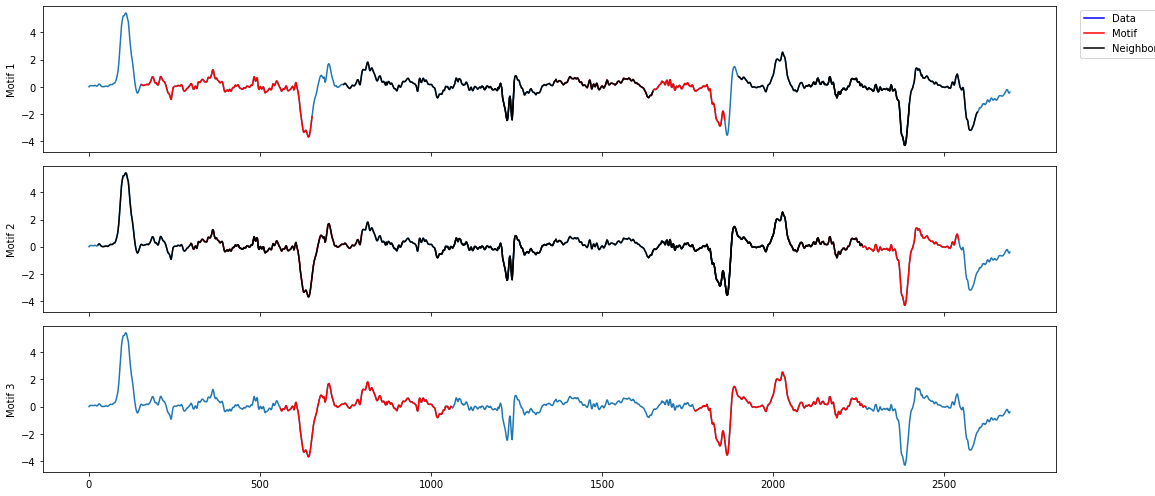

In [15]:
profile = mp.compute(gyroscope_data_frame['gyroscope_y'].to_numpy(), n_jobs=-1, windows=window_size)
profile_motifs = mp.discover.motifs(profile, k=3)
figures = mp.visualize(profile_motifs)


### Gyro z

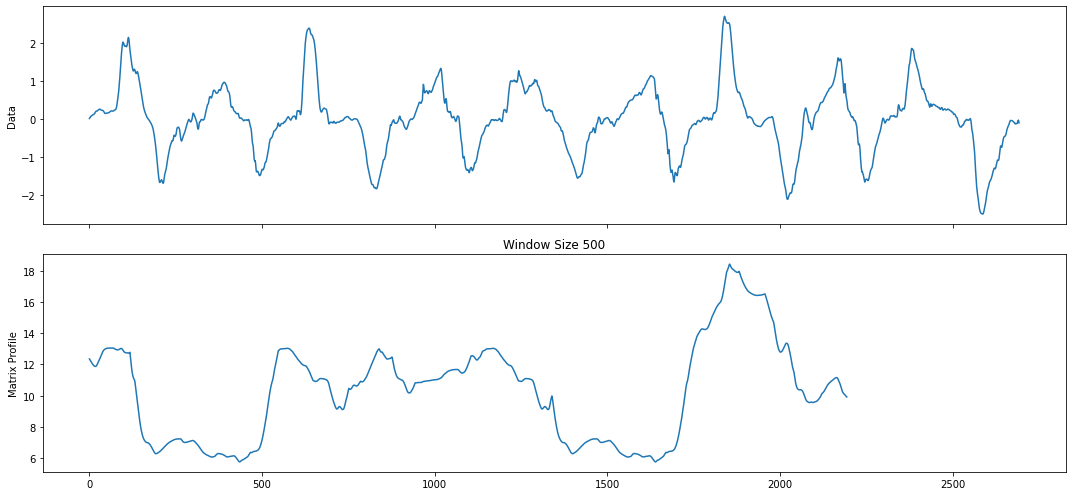

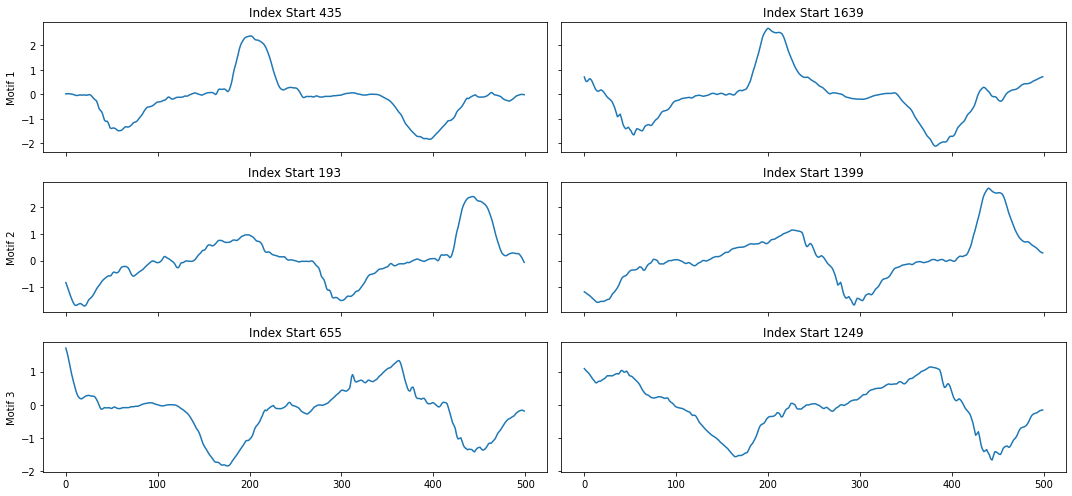

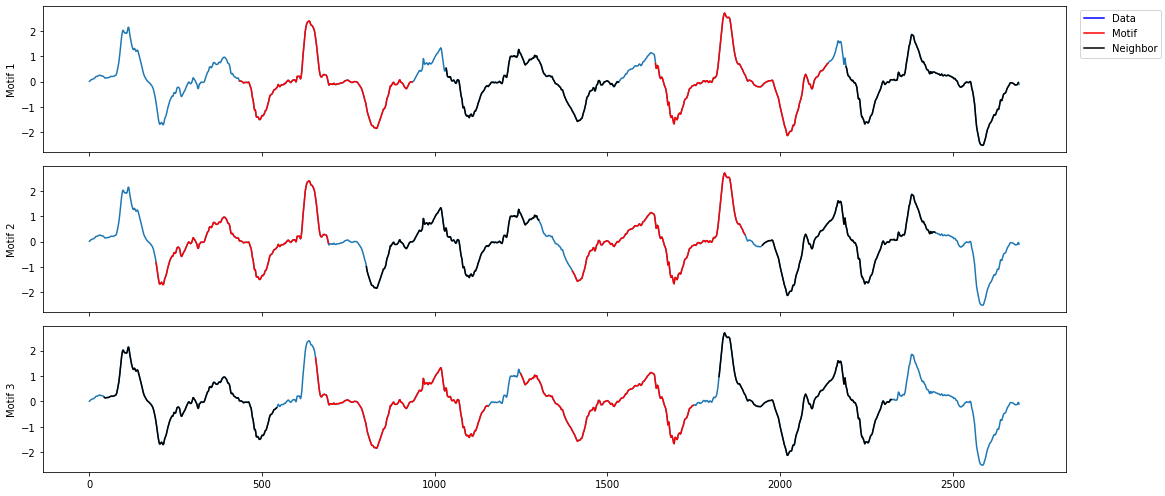

In [16]:
profile = mp.compute(gyroscope_data_frame['gyroscope_z'].to_numpy(), n_jobs=-1, windows=window_size)
profile_motifs = mp.discover.motifs(profile, k=3)
figures = mp.visualize(profile_motifs)

Now we've seen the plots for different univariate MPAs. To get a full recognition
on top of all data streams we need to reduce the dimensionality of the data (using PCA).